### Logistic Regression
an algorithm that is used to solve classification problem.
response variable is categorical or discrete in nature. predicts probability of an event or variable to occur. 

Equation: odds = p/ 1-p

linear regression graph has straight line whereas logistic regression has s shape curve called sigmoid function.

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
from sklearn import metrics

In [3]:
#load a builtin image dataset from sklearn 
#the dataset already comes pre-split into data and labels.
digits = load_digits()

In [4]:
# 1797 images, each flattened into 8*8 pixels (64 numbers)
digits.images.shape

(1797, 8, 8)

In [5]:
print("Image Data Shape", digits.data.shape) #input features

print("Label Data Shape", digits.target.shape)
 #correct label for each image
 #One label per image where each value is a digit from 0 to 9

Image Data Shape (1797, 64)
Label Data Shape (1797,)


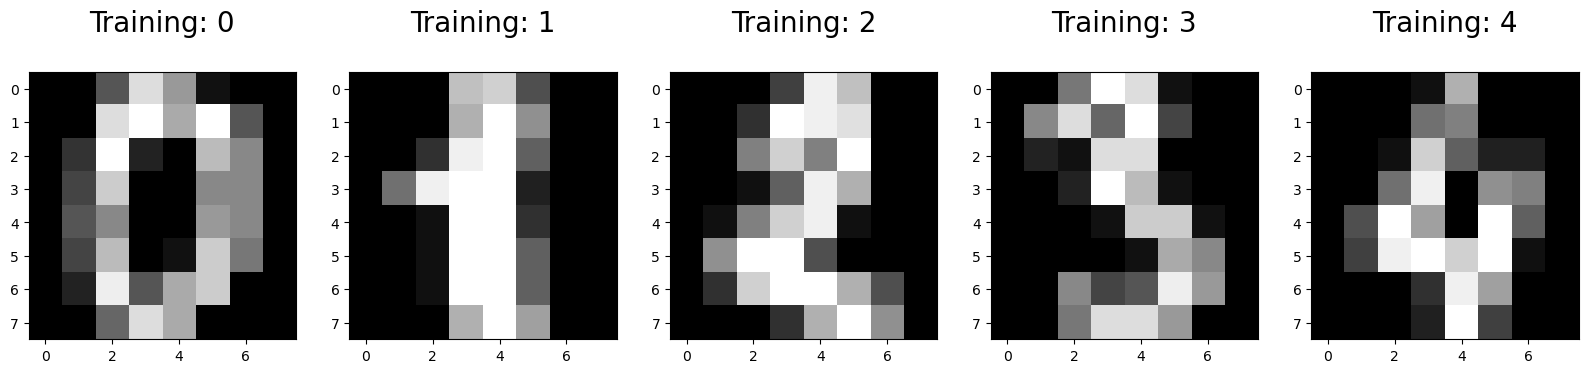

In [9]:
# Display first five images in dataset
plt.figure(figsize=(20,4))
#enumerates adds an index
# zip pairs each image with its label
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

plt.show()
plt.close()

#since i'm using jupyter notebook inside vscode i used "plt.close" cz otherwise my code was displaying images twice
# Prevents VS Code from re-rendering it 

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [11]:
print(x_train.shape)

(1383, 64)


In [12]:
print(y_train.shape)

(1383,)


In [13]:
print(x_test.shape)
print(y_test.shape)

(414, 64)
(414,)


In [15]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=500)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [16]:

print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [17]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [18]:
predictions = logisticRegr.predict(x_test)

In [19]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9516908212560387


In [20]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  1]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


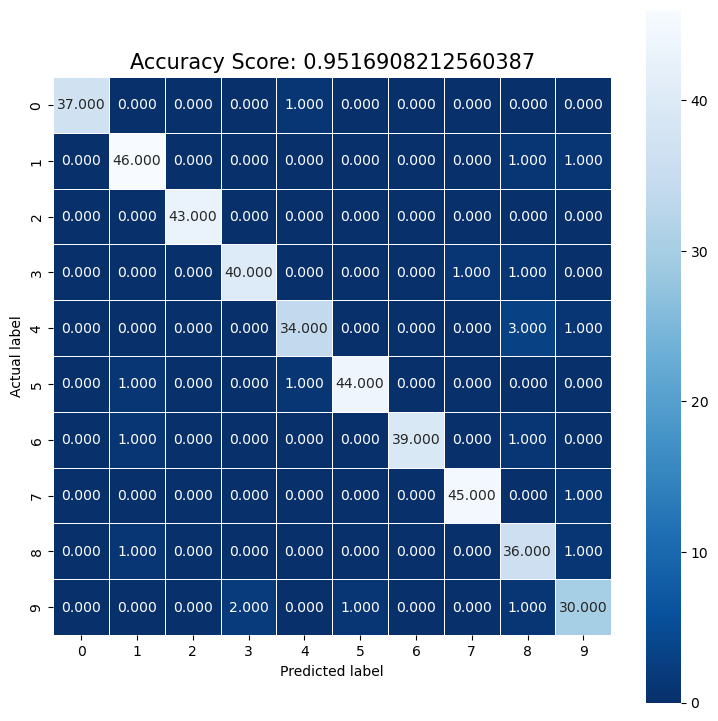

In [21]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

plt.show()